Text(0.5, 1.0, 'petal plot')

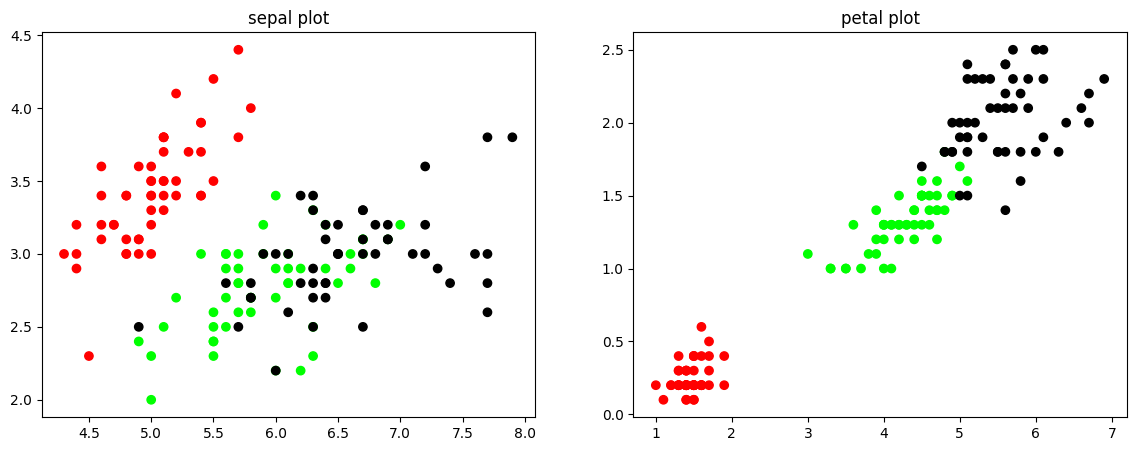

In [78]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

iris = load_iris()
x = pd.DataFrame(iris.data,columns=["sepal_length","sepal_width","petal_length","petal_width"])
y = pd.DataFrame(iris.target,columns=["target"])

colormap = np.array(["red","lime","black"])
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(x.sepal_length,x.sepal_width,c=colormap[y.target])
plt.title("sepal plot")

plt.subplot(1,2,2)
plt.scatter(x.petal_length,x.petal_width,c=colormap[y.target])
plt.title("petal plot")

KMeans accuracy: 0.24
KMeans confusion Matrix:
 [[ 0 48 14]
 [50  0  0]
 [ 0  2 36]]
GMM accuracy: 0.9666666666666667
GMM confusion Matrix:
 [[50  0  0]
 [ 0 45  0]
 [ 0  5 50]]


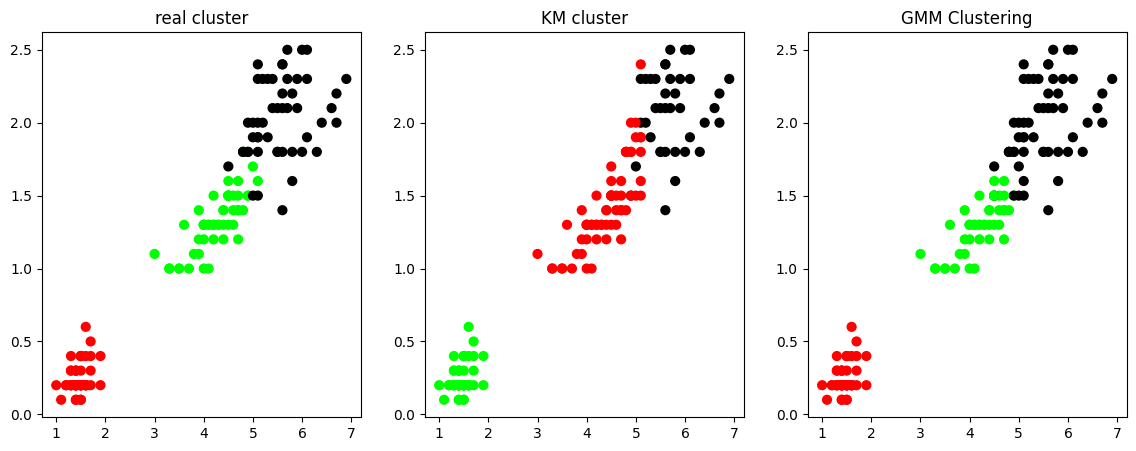

In [120]:
# KMM
km = KMeans(n_clusters=3)
km.fit(x)
print("KMeans accuracy:",metrics.accuracy_score(km.labels_,y.target))
print("KMeans confusion Matrix:\n",metrics.confusion_matrix(km.labels_,y.target))

plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
plt.scatter(x.petal_length, x.petal_width, c=colormap[y.target],s=40)
plt.title("real cluster")

plt.subplot(1,3,2)
plt.scatter(x.petal_length, x.petal_width, c=colormap[km.labels_],s=40)
plt.title("KM cluster")

# GMM
scaler = StandardScaler()
xsa = scaler.fit_transform(x)
xs = pd.DataFrame(xsa, columns=x.columns)

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_labels = gmm.predict(xs)
print("GMM accuracy:",metrics.accuracy_score(gmm_labels,y.target))
print("GMM confusion Matrix:\n",metrics.confusion_matrix(gmm_labels,y.target))

plt.subplot(1,3,3)
plt.scatter(x.petal_length, x.petal_width, c=colormap[gmm_labels], s=40)
plt.title('GMM Clustering')
plt.show()